<a href="https://colab.research.google.com/github/Murarin8877/FinancialBigDataAnalysis-homework/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
!pip install yfinance #yahoo finance lib

In [174]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [175]:
# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-01,783.0,783.0,769.0,770.0,763.630127,21041261
1,2024-04-02,784.0,790.0,783.0,790.0,783.464661,37974481
2,2024-04-03,783.0,785.0,778.0,780.0,773.547363,30890544
3,2024-04-08,789.0,792.0,783.0,783.0,776.522583,32202226
4,2024-04-09,795.0,820.0,792.0,819.0,812.224792,56857731
...,...,...,...,...,...,...,...
118,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067
119,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975
120,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222
121,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585


#均線計算

In [176]:
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20
118,2024-09-23,971.0,977.0,971.0,977.0,977.0,14497067,959.6,938.9,936.45
119,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,967.6,947.7,938.30
120,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,980.4,957.8,941.45
121,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,991.4,969.2,944.00
122,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,996.8,975.2,946.85


#RSI

In [177]:
# 計算每日的價格變動
df['Change'] = df['Close'] - df['Close'].shift(1)

# 計算漲跌分別的平均值
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

# 計算14日的平均漲幅和平均跌幅
window_length = 14
df['Avg_Gain'] = df['Gain'].rolling(window=window_length).mean()
df['Avg_Loss'] = df['Loss'].rolling(window=window_length).mean()

# 計算相對強弱 (Relative Strength, RS)
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']

# 計算相對強弱指數 (RSI)
df['RSI'] = 100 - (100 / (1 + df['RS']))

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
118,2024-09-23,971.0,977.0,971.0,977.0,977.0,14497067,959.6,938.9,936.45,4.0,4.0,0.0,8.285714,6.214286,1.333333,57.142857
119,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,967.6,947.7,938.30,10.0,10.0,0.0,9.000000,5.642857,1.594937,61.463415
120,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,980.4,957.8,941.45,18.0,18.0,0.0,10.285714,2.000000,5.142857,83.720930
121,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,991.4,969.2,944.00,10.0,10.0,0.0,10.071429,2.000000,5.035714,83.431953
122,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,996.8,975.2,946.85,-15.0,0.0,15.0,8.928571,3.071429,2.906977,74.404762


#MACD

In [178]:
# 計算12日和26日的指數移動平均線 (EMA)
df['EMA_8'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_13'] = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = df['EMA_8'] - df['EMA_13']

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-04-01,783.0,783.0,769.0,770.0,763.630127,21041261,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,770.000000,770.000000,0.000000
1,2024-04-02,784.0,790.0,783.0,790.0,783.464661,37974481,NaN,NaN,NaN,20.0,20.0,0.0,NaN,NaN,NaN,NaN,773.076923,771.481481,1.595442
2,2024-04-03,783.0,785.0,778.0,780.0,773.547363,30890544,NaN,NaN,NaN,-10.0,0.0,10.0,NaN,NaN,NaN,NaN,774.142012,772.112483,2.029529
3,2024-04-08,789.0,792.0,783.0,783.0,776.522583,32202226,NaN,NaN,NaN,3.0,3.0,0.0,NaN,NaN,NaN,NaN,775.504779,772.918966,2.585814
4,2024-04-09,795.0,820.0,792.0,819.0,812.224792,56857731,788.4,NaN,NaN,36.0,36.0,0.0,NaN,NaN,NaN,NaN,782.196352,776.332376,5.863976


#可視化圖表

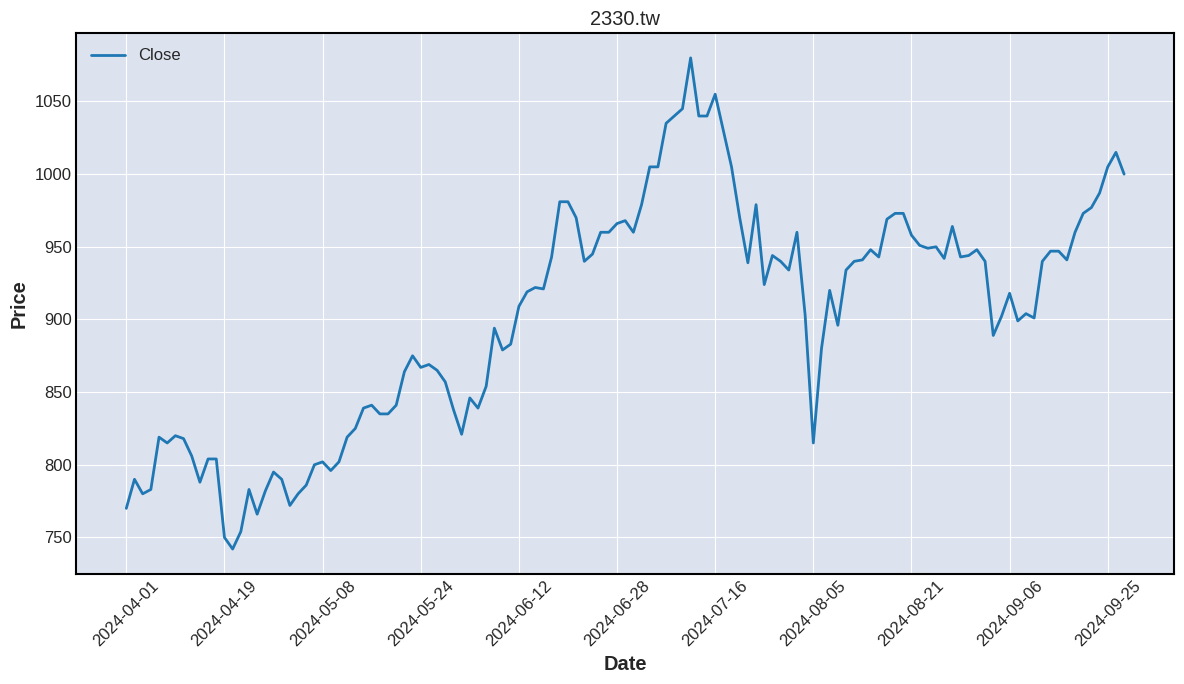

In [179]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

In [180]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-04-01,783.0,783.0,769.0,770.0,763.630127,21041261,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,770.000000,770.000000,0.000000
1,2024-04-02,784.0,790.0,783.0,790.0,783.464661,37974481,NaN,NaN,NaN,20.0,20.0,0.0,NaN,NaN,NaN,NaN,773.076923,771.481481,1.595442
2,2024-04-03,783.0,785.0,778.0,780.0,773.547363,30890544,NaN,NaN,NaN,-10.0,0.0,10.0,NaN,NaN,NaN,NaN,774.142012,772.112483,2.029529
3,2024-04-08,789.0,792.0,783.0,783.0,776.522583,32202226,NaN,NaN,NaN,3.0,3.0,0.0,NaN,NaN,NaN,NaN,775.504779,772.918966,2.585814
4,2024-04-09,795.0,820.0,792.0,819.0,812.224792,56857731,788.4,NaN,NaN,36.0,36.0,0.0,NaN,NaN,NaN,NaN,782.196352,776.332376,5.863976


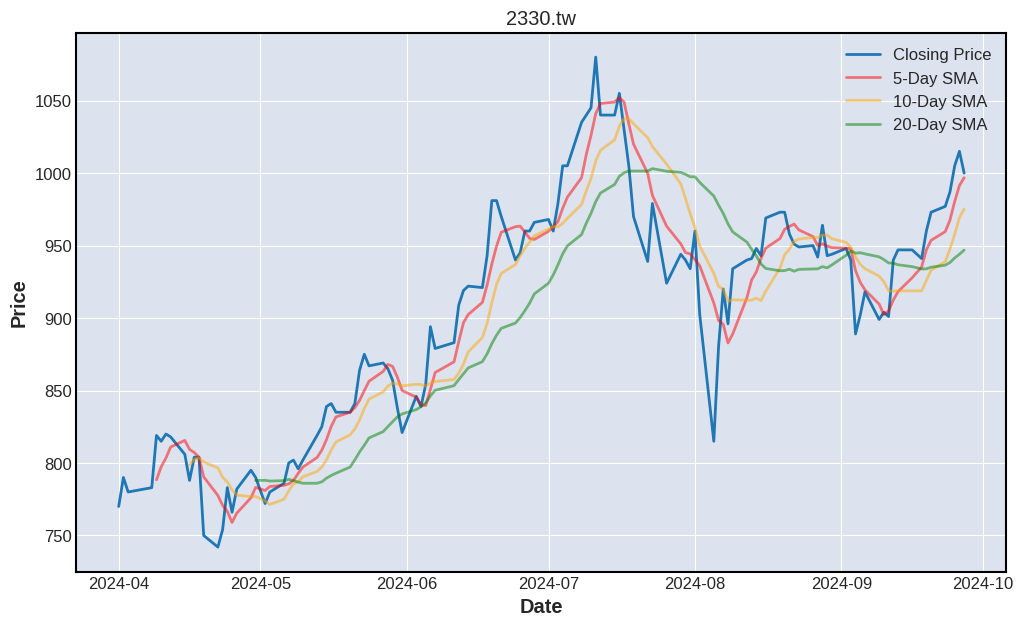

In [181]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['SMA_5'], label='5-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['SMA_10'], label='10-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['SMA_20'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

#繪製K線

In [182]:
!pip install mplfinance

In [183]:
kplot_df = df.set_index('Date')
kplot_df['2024-8-01':'2024-09-18'].tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,,
2024-09-11,906.0,906.0,900.0,901.0,897.0,18029342,904.8,918.8,938.00,-3.0,0.0,3.0,4.428571,8.000000,0.553571,35.632184,919.064126,931.199712,-12.135586
2024-09-12,936.0,944.0,928.0,940.0,940.0,39454846,912.4,918.5,937.85,39.0,39.0,0.0,7.214286,7.857143,0.918182,47.867299,922.285030,931.851585,-9.566556
2024-09-13,955.0,955.0,939.0,947.0,947.0,25347586,918.2,918.8,936.75,7.0,7.0,0.0,7.642857,7.857143,0.972727,49.308756,926.087333,932.973690,-6.886357
2024-09-16,952.0,952.0,943.0,947.0,947.0,13626239,927.8,918.7,935.45,0.0,0.0,0.0,7.642857,7.285714,1.049020,51.196172,929.304666,934.012676,-4.708010
2024-09-18,945.0,948.0,933.0,941.0,941.0,28424324,935.2,918.8,933.85,-6.0,0.0,6.0,6.071429,7.714286,0.787037,44.041451,931.103948,934.530255,-3.426307


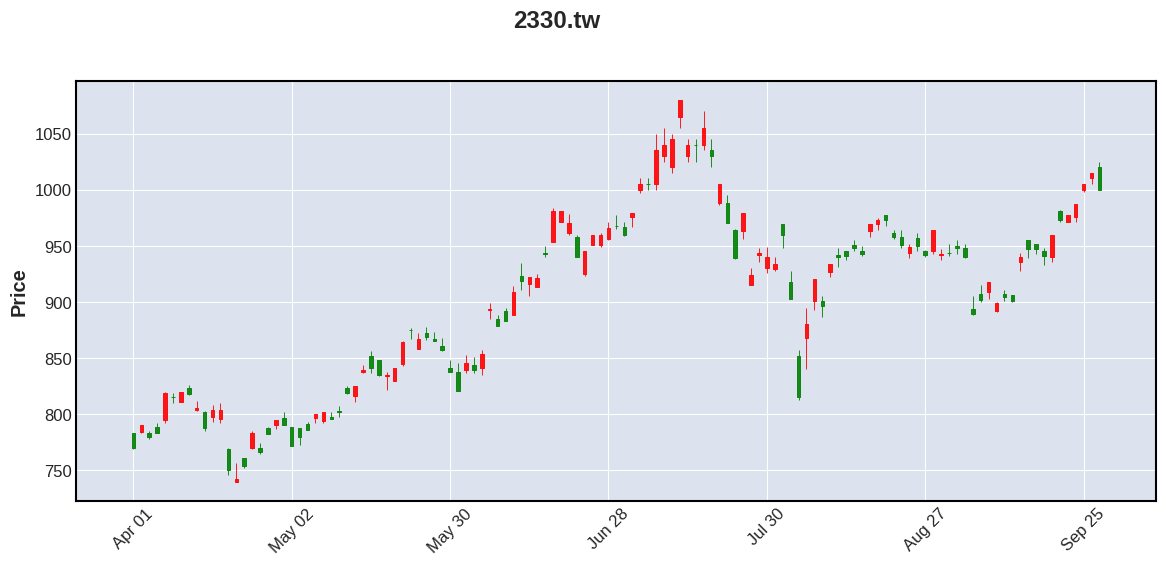

In [184]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

捕捉流星線（Shooting Star）

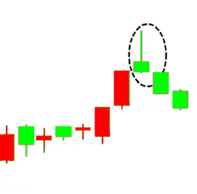

In [185]:
# 計算每一根K線的實體和影線的長度
df['Body'] = abs(df['Close'] - df['Open'])
df['Upper_Shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))
df['Lower_Shadow'] = abs(df[['Open', 'Close']].min(axis=1) - df['Low'])

# 定義流星線的條件

Shooting_Star_condition = (
    (df['Upper_Shadow'] >= 2.5 * df['Body']) &
    (df['Lower_Shadow'] <= 0.1 * df['Body']) &
    (df['Close'] < df['Open'])
    )

Shooting_Star_df = df[Shooting_Star_condition]
Shooting_Star_df.set_index('Date', inplace=True)

Shooting_Star_df

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,Change,...,Avg_Gain,Avg_Loss,RS,RSI,EMA_8,EMA_13,MACD,Body,Upper_Shadow,Lower_Shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-28,867.0,873.0,865.0,865.0,857.844177,25329216,868.0,853.1,825.15,-4.0,...,6.214286,1.714286,3.625,78.378378,847.679001,826.004886,21.674115,2.0,6.0,0.0


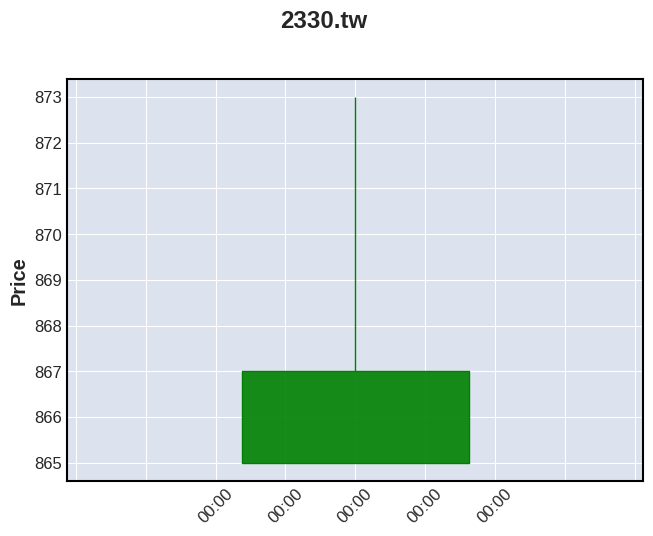

In [186]:
mpf.plot(Shooting_Star_df, type='candle', style=my_style, title=f'{stock_id}')

捕捉 Doji 型態

In [187]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,Change,...,Avg_Loss,RS,RSI,EMA_8,EMA_13,MACD,Body,Upper_Shadow,Lower_Shadow,body_length
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-10,815.0,819.0,810.0,815.0,808.257812,27480849,797.4,NaN,NaN,-4.0,...,NaN,NaN,NaN,787.243067,779.196644,8.046423,0.0,4.0,5.0,0.0
2024-05-20,834.0,838.0,822.0,835.0,828.092346,28808661,835.0,819.4,797.20,0.0,...,2.500000,2.142857,68.181818,817.827176,803.556024,14.271152,1.0,3.0,12.0,1.0
2024-05-23,875.0,877.0,867.0,875.0,867.761475,37266618,850.0,837.6,812.25,11.0,...,0.857143,8.916667,89.915966,835.186150,815.371787,19.814363,0.0,2.0,8.0,0.0
2024-06-06,893.0,899.0,885.0,894.0,886.604309,62925136,850.8,855.0,846.30,40.0,...,4.500000,1.936508,65.945946,852.292056,836.741746,15.550310,1.0,5.0,8.0,1.0
2024-06-18,944.0,950.0,940.0,943.0,938.813538,37876013,922.8,896.3,875.30,22.0,...,4.785714,2.164179,68.396226,897.116689,868.882046,28.234643,1.0,6.0,3.0,1.0
2024-07-01,968.0,977.0,965.0,968.0,963.702515,19935737,959.8,961.4,924.00,2.0,...,3.000000,3.023810,75.147929,947.928885,915.812344,32.116541,0.0,9.0,3.0,0.0
2024-07-05,1005.0,1010.0,1000.0,1005.0,1000.538269,19998094,983.4,968.8,949.80,0.0,...,3.500000,2.714286,73.076923,968.685999,935.147132,33.538867,0.0,5.0,5.0,0.0
2024-07-15,1040.0,1045.0,1025.0,1040.0,1035.382935,38393309,1049.0,1022.9,992.15,0.0,...,3.428571,2.979167,74.869110,1018.364327,976.507114,41.857212,0.0,5.0,15.0,0.0
2024-08-29,942.0,947.0,937.0,943.0,938.813538,43530708,949.6,957.2,934.60,-21.0,...,4.142857,1.155172,53.600000,949.774603,949.174176,0.600426,1.0,4.0,5.0,1.0


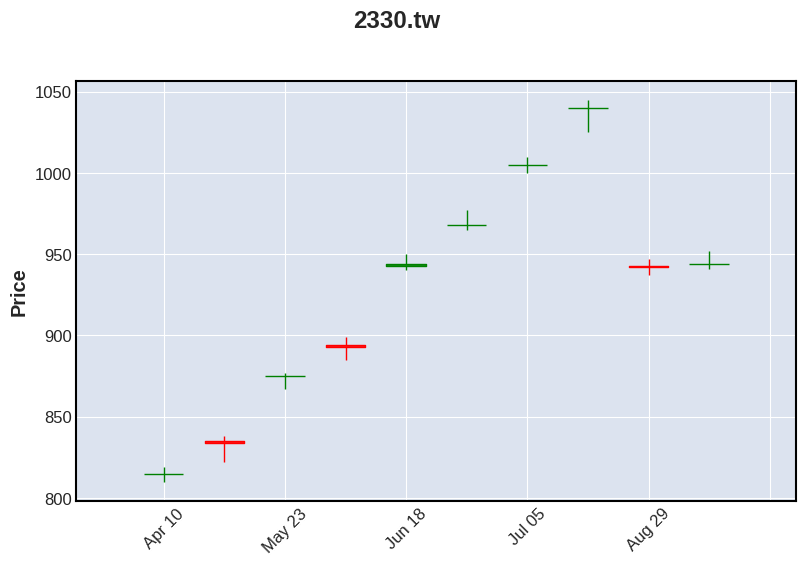

In [188]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

#機器學習預測股價漲跌

In [ ]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [189]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,...,Avg_Loss,RS,RSI,EMA_8,EMA_13,MACD,Body,Upper_Shadow,Lower_Shadow,body_length
0,2024-04-01,783.0,783.0,769.0,770.0,763.630127,21041261,NaN,NaN,NaN,...,NaN,NaN,NaN,770.000000,770.000000,0.000000,13.0,0.0,1.0,13.0
1,2024-04-02,784.0,790.0,783.0,790.0,783.464661,37974481,NaN,NaN,NaN,...,NaN,NaN,NaN,773.076923,771.481481,1.595442,6.0,0.0,1.0,6.0
2,2024-04-03,783.0,785.0,778.0,780.0,773.547363,30890544,NaN,NaN,NaN,...,NaN,NaN,NaN,774.142012,772.112483,2.029529,3.0,2.0,2.0,3.0
3,2024-04-08,789.0,792.0,783.0,783.0,776.522583,32202226,NaN,NaN,NaN,...,NaN,NaN,NaN,775.504779,772.918966,2.585814,6.0,3.0,0.0,6.0
4,2024-04-09,795.0,820.0,792.0,819.0,812.224792,56857731,788.4,NaN,NaN,...,NaN,NaN,NaN,782.196352,776.332376,5.863976,24.0,1.0,3.0,24.0


In [198]:
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

In [199]:
df2 = df.copy()#只限於linear使用

In [222]:
def select_features(features):
  #copy新的df，避免更新到原始df，且將上面程式碼移出去避免每次將最後一列刪除
  df2 = df.copy()
  print(f"使用的特徵{features}")
  # 使用特徵
  X = df2[features]

  # 標籤（未來價格）
  y = df2['Future_Price']
  print(X.shape, y.shape)
  return X,y

In [213]:
def split_data(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

#線性回歸（Linear Regression）

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [217]:
def LRegression(features):
  X,y = select_features(features)
  X_train, X_test, y_train, y_test = split_data(X,y)
  model = LinearRegression()
  model.fit(X_train, y_train)

  # 預測
  y_pred = model.predict(X_test)

  # 評估
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print(f"{features}線性回歸模型RMSE: {rmse:.2f}")

  # 使用模型進行未來價格走勢預測
  future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
  print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")
  return y_test,y_pred

In [271]:
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_20,...,RS,RSI,EMA_8,EMA_13,MACD,Body,Upper_Shadow,Lower_Shadow,body_length,Future_Price
117,2024-09-20,981.0,982.0,971.0,973.0,973.0,60133709,953.6,933.0,935.05,...,1.333333,57.142857,941.311111,939.126762,2.184349,8.0,1.0,2.0,8.0,977.0
118,2024-09-23,971.0,977.0,971.0,977.0,977.0,14497067,959.6,938.9,936.45,...,1.333333,57.142857,946.801709,941.932187,4.869522,6.0,0.0,0.0,6.0,987.0
119,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,967.6,947.7,938.30,...,1.594937,61.463415,952.986062,945.270544,7.715518,11.0,0.0,5.0,11.0,1005.0
120,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,980.4,957.8,941.45,...,5.142857,83.720930,960.988206,949.694948,11.293258,5.0,0.0,2.0,5.0,1015.0
121,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,991.4,969.2,944.00,...,5.035714,83.431953,969.297713,954.532359,14.765354,5.0,0.0,5.0,5.0,1000.0


In [272]:
features_SMA_5 = ['SMA_5', 'RSI', 'MACD']
features_SMA_10 = ['SMA_10', 'RSI', 'MACD']
features_SMA_20 = ['SMA_20', 'RSI', 'MACD']
features = ['SMA_5','SMA_10','SMA_20', 'RSI', 'MACD']
LRegression_5SMA = LRegression(features_SMA_5)
print("-----------------------------")
LRegression_10SMA = LRegression(features_SMA_10)
print("-----------------------------")
LRegression_20SMA = LRegression(features_SMA_20)
print("-----------------------------")
LRegression_ = LRegression(features)

使用的特徵['SMA_5', 'RSI', 'MACD']
(103, 3) (103,)
(82, 3) (21, 3) (82,) (21,)
['SMA_5', 'RSI', 'MACD']線性回歸模型RMSE: 23.39
線性回歸模型預測未來1天的價格: 1010.36
-----------------------------
使用的特徵['SMA_10', 'RSI', 'MACD']
(103, 3) (103,)
(82, 3) (21, 3) (82,) (21,)
['SMA_10', 'RSI', 'MACD']線性回歸模型RMSE: 30.60
線性回歸模型預測未來1天的價格: 1003.37
-----------------------------
使用的特徵['SMA_20', 'RSI', 'MACD']
(103, 3) (103,)
(82, 3) (21, 3) (82,) (21,)
['SMA_20', 'RSI', 'MACD']線性回歸模型RMSE: 31.53
線性回歸模型預測未來1天的價格: 1002.39
-----------------------------
使用的特徵['SMA_5', 'SMA_10', 'SMA_20', 'RSI', 'MACD']
(103, 5) (103,)
(82, 5) (21, 5) (82,) (21,)
['SMA_5', 'SMA_10', 'SMA_20', 'RSI', 'MACD']線性回歸模型RMSE: 23.85
線性回歸模型預測未來1天的價格: 1006.68


In [220]:
# 畫出測試集的實際價格與預測價格走勢圖
def show_figure(y_test,y_pred):
  plt.figure(figsize=(14, 7))
  plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
  plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('2230.TW Actual vs Predicted Prices on Test Set')
  plt.legend()
  plt.grid(True)
  plt.show()

使用的特徵['SMA_10', 'RSI', 'MACD']
(103, 3) (103,)
(82, 3) (21, 3) (82,) (21,)
['SMA_10', 'RSI', 'MACD']線性回歸模型RMSE: 30.60
線性回歸模型預測未來1天的價格: 1003.37


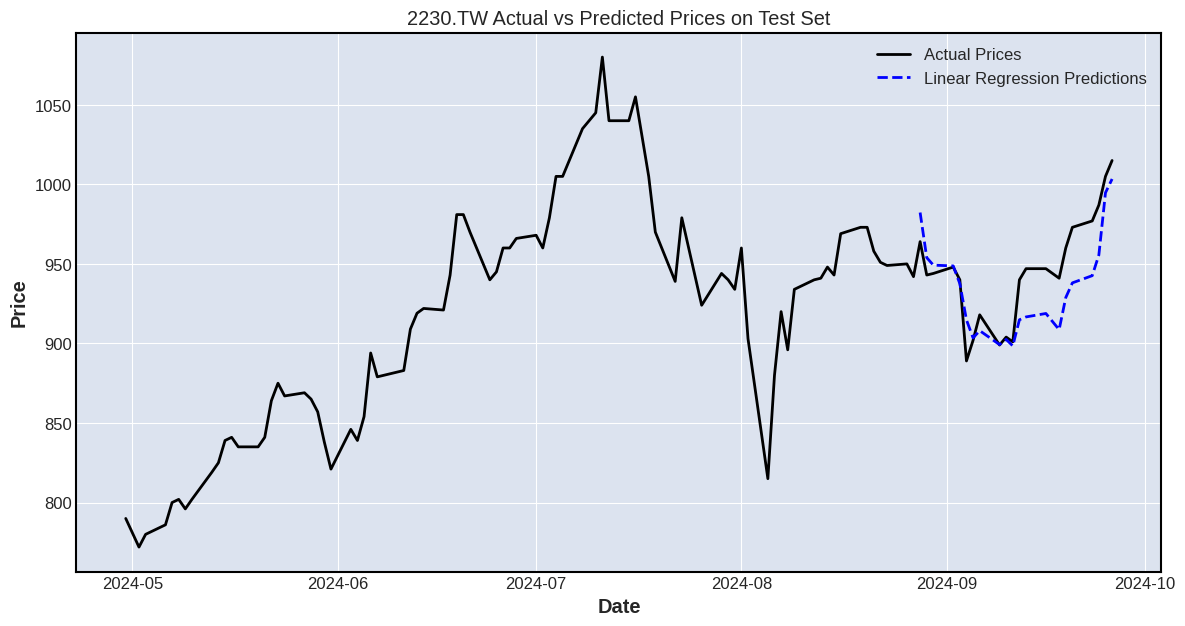

In [221]:
y_test,y_pred = LRegression(features_SMA_10)
show_figure(y_test,y_pred)

使用的特徵['SMA_5', 'RSI', 'MACD']
(103, 3) (103,)
(82, 3) (21, 3) (82,) (21,)
['SMA_5', 'RSI', 'MACD']線性回歸模型RMSE: 23.39
線性回歸模型預測未來1天的價格: 1010.36


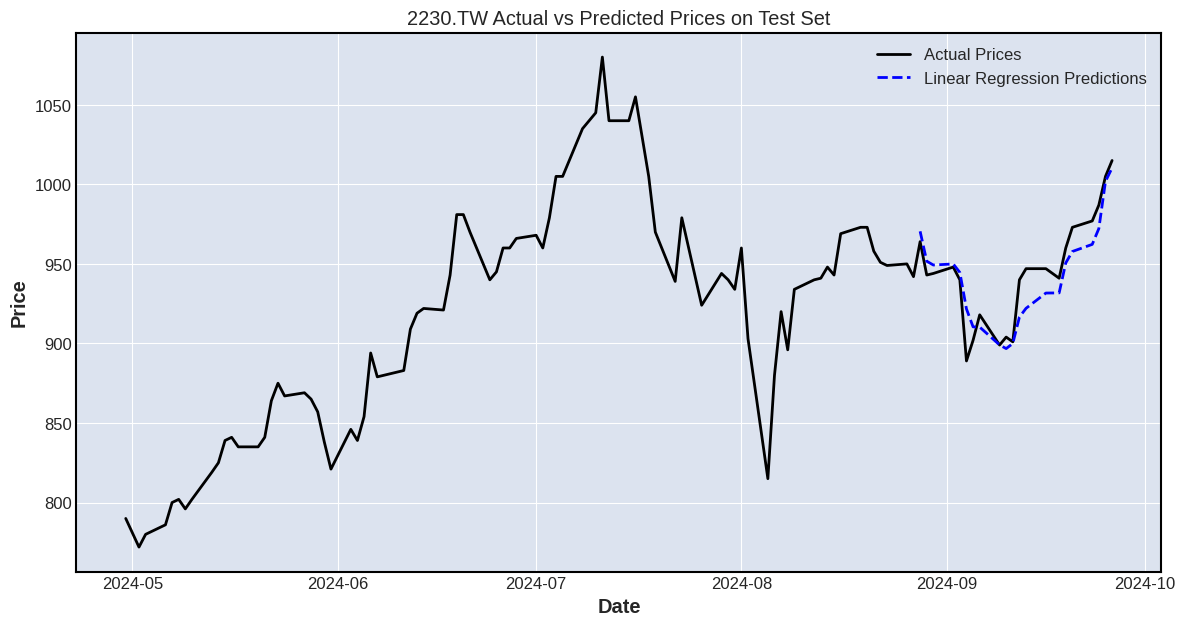

In [270]:
y_test,y_pred = LRegression(features_SMA_5)
show_figure(y_test,y_pred)

#Decision Tree

In [262]:
df3 = df.copy()

In [282]:
df3.shape == df2.shape ==df.shape#判斷預測的價格是否為同一天

True

In [273]:
# 標籤生成: 預測未來1天的價格，這裡以2024-04-01的技術指標 預測隔天的收盤價
n = 1
#df3['Future_Price'] = df3['Close'].shift(-n)

# 去除缺失值
#df3.dropna(inplace=True)

# 使用特徵
X = df3[['SMA_5', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df3['Future_Price']

X.shape, y.shape

((103, 3), (103,))

In [274]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82, 3), (21, 3), (82,), (21,))

In [279]:

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 41.40
決策樹模型預測未來1天的價格: 1005.00


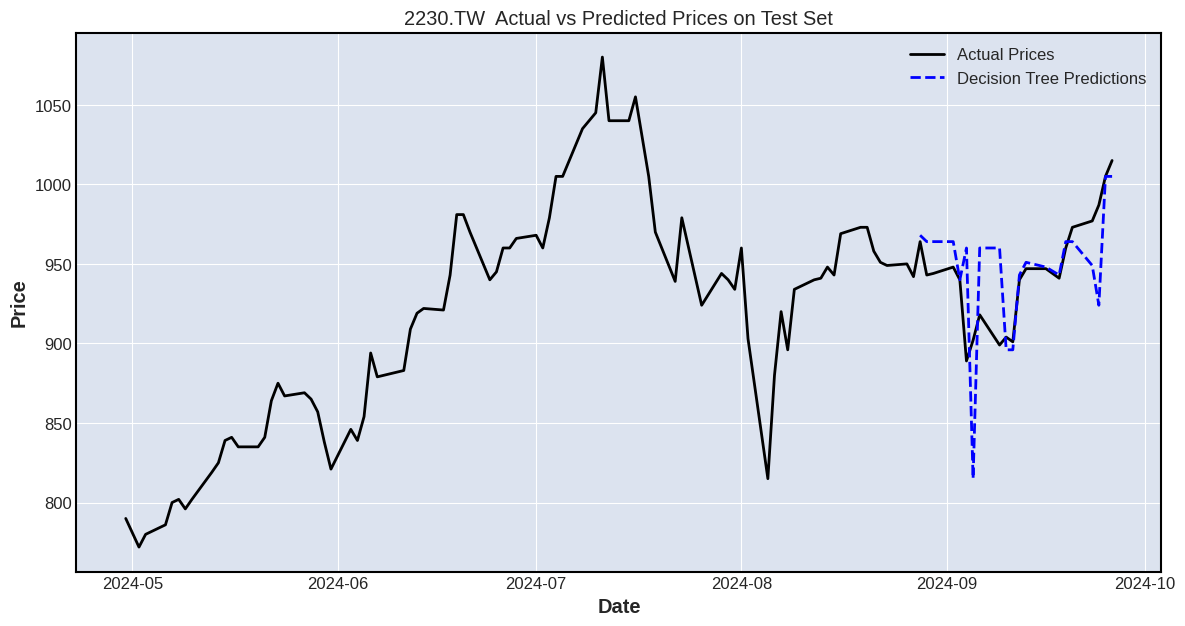

In [280]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df3['Date'], df3['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df3['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

#Random Forest

In [281]:
# 引入隨機森林模型

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 28.62
隨機森林模型預測未來1天的價格: 981.21


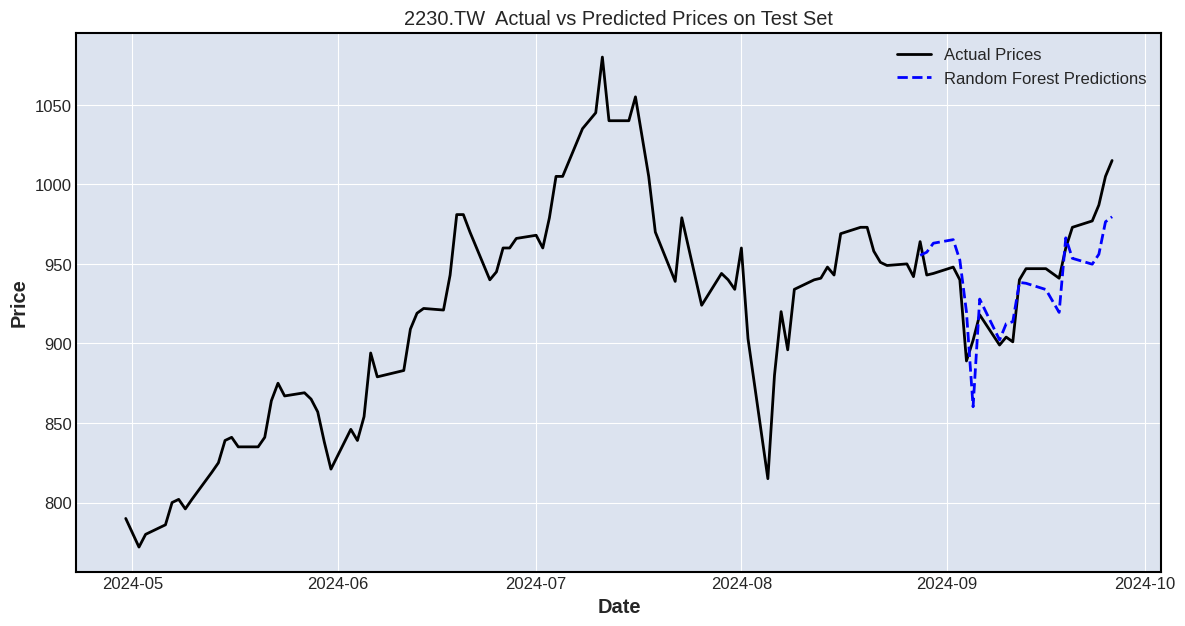

In [278]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df3['Date'], df3['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df3['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()